# Predicting Traffic Accident Severity

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

import datetime as dt

import warnings
warnings.filterwarnings('ignore')

### importing the data

In [4]:
df = pd.read_csv('Data.csv', index_col=0)
df.head(10)

,ID,time,lum,agg,int,atm,col,lat,long,dep,...,situation,school,crit_age,ped,dead_age,num_us,sev,date,weekend,holiday
0,201600000001,14.0,1,2,1,8.0,3.0,0.0,0,590,...,1.0,0.0,0,0,0,2,1,2016-02-01,0,0.0
1,201600000002,18.0,1,2,6,1.0,6.0,0.0,0,590,...,1.0,0.0,0,0,0,3,1,2016-03-16,0,0.0
2,201600000003,19.0,1,1,1,1.0,6.0,0.0,0,590,...,3.0,99.0,1,1,0,2,1,2016-07-13,0,0.0
3,201600000004,19.0,2,2,1,7.0,3.0,0.0,0,590,...,1.0,99.0,1,0,0,3,1,2016-08-15,0,1.0
4,201600000005,11.0,1,2,3,1.0,3.0,0.0,0,590,...,1.0,3.0,0,0,0,3,1,2016-12-23,0,0.0
5,201600000006,11.0,1,2,1,7.0,6.0,0.0,0,590,...,1.0,99.0,0,1,0,2,1,2016-12-23,0,0.0
6,201600000007,11.0,1,2,1,7.0,2.0,0.0,0,590,...,1.0,99.0,0,0,0,3,0,2016-05-01,1,1.0
7,201600000008,19.0,2,1,1,1.0,1.0,0.0,0,590,...,1.0,0.0,0,0,0,3,1,2016-05-14,1,0.0
8,201600000009,19.0,1,2,1,1.0,3.0,0.0,0,590,...,1.0,99.0,0,0,0,2,1,2016-09-23,0,0.0
9,201600000010,10.0,1,1,1,9.0,6.0,0.0,0,590,...,1.0,0.0,0,1,0,2,1,2016-12-30,0,0.0


### Keeping Missing values and outliers into different catogories"other Cases"

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 839985 entries, 0 to 839984
Data columns (total 29 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   ID         839985 non-null  int64  
 1   time       839985 non-null  float64
 2   lum        839985 non-null  int64  
 3   agg        839985 non-null  int64  
 4   int        839985 non-null  int64  
 5   atm        839930 non-null  float64
 6   col        839974 non-null  float64
 7   lat        362471 non-null  float64
 8   long       362467 non-null  object 
 9   dep        839985 non-null  int64  
 10  road_cat   839984 non-null  float64
 11  road_num   780914 non-null  object 
 12  traf_reg   839187 non-null  float64
 13  num_lanes  838195 non-null  float64
 14  res_lane   838345 non-null  float64
 15  long_prof  838924 non-null  float64
 16  shape      838909 non-null  float64
 17  surf       838968 non-null  float64
 18  infra      838707 non-null  float64
 19  situation  838983 non-n

In [6]:
df['road_num'].describe()

count     780914.0
unique      2088.0
top            0.0
freq      439016.0
Name: road_num, dtype: float64

In [7]:
df.drop(['lat', 'long', 'road_num'], axis=1, inplace=True)

In [8]:
print('Missing values in atm:', df["atm"].isna().sum(),'\n'
    'Missing values in collision:', df["col"].isna().sum(), '\n'
    'Missing values in road_cat:', df["road_cat"].isna().sum(),'\n'
    'Missing values in surf:', df["surf"].isna().sum())

Missing values in atm: 55 
Missing values in collision: 11 
Missing values in road_cat: 1 
Missing values in surf: 1017


### Frequency of the different features

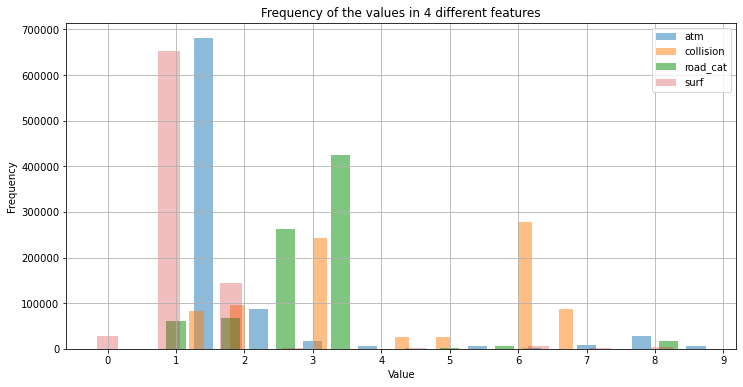

In [9]:
df['atm'].hist(alpha=0.5, rwidth=0.35, align='mid', figsize=(12,6), label='atm')
df['col'].hist(alpha=0.5, rwidth=0.35, align='mid', label='collision')
df['road_cat'].hist(alpha=0.6, rwidth=0.35, align='left', label='road_cat')
df['surf'].hist(alpha=0.3,rwidth=0.35, align='left', label='surf')
plt.title('Frequency of the values in 4 different features', size=12)
plt.xticks(range(10))
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

- The value 0 is the outlier while other features value is 1

In [10]:
df['atm'].fillna(9, inplace=True)
df['col'].fillna(6, inplace=True)
df['road_cat'].fillna(9, inplace=True)
df['surf'].fillna(9, inplace=True)
df['surf'].replace(0,9, inplace=True)
df.surf.value_counts()

1.0    652322
2.0    143254
9.0     32498
7.0      5474
5.0      2643
8.0      2159
3.0       861
6.0       466
4.0       308
Name: surf, dtype: int64

In [11]:
df[['traf_reg', 'num_lanes','res_lane', 'long_prof', 'shape', 'infra', 'situation']].describe()

,traf_reg,num_lanes,res_lane,long_prof,shape,infra,situation
count,839187.000000,838195.000000,838345.000000,838924.000000,838909.000000,838707.000000,838983.000000
mean,1.855246,2.039593,0.130675,1.135474,1.198732,0.438958,1.147201
std,0.720949,1.550779,0.555434,0.620295,0.722200,1.350905,0.722495
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,0.000000,1.000000,1.000000,0.000000,1.000000
50%,2.000000,2.000000,0.000000,1.000000,1.000000,0.000000,1.000000
75%,2.000000,2.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,4.000000,99.000000,3.000000,4.000000,4.000000,7.000000,5.000000


In [12]:
df.drop(['infra', 'res_lane'], axis=1, inplace=True)


In [13]:

df['num_lanes'].value_counts()

2.0     464716
0.0     102796
1.0     101345
4.0      76934
3.0      66252
6.0      13945
5.0       7839
8.0       2332
7.0        840
10.0       407
20.0       241
50.0       158
9.0        148
11.0        32
12.0        32
40.0        30
30.0        27
13.0        15
25.0        14
21.0        11
26.0         9
15.0         8
90.0         7
14.0         6
24.0         6
70.0         5
22.0         5
31.0         3
60.0         3
17.0         2
16.0         2
53.0         2
27.0         2
45.0         2
41.0         1
44.0         1
33.0         1
29.0         1
52.0         1
39.0         1
28.0         1
36.0         1
62.0         1
42.0         1
76.0         1
65.0         1
84.0         1
23.0         1
91.0         1
54.0         1
18.0         1
86.0         1
99.0         1
Name: num_lanes, dtype: int64

In [14]:
df.num_lanes.fillna(0, inplace=True)
df['num_lanes'] = df['num_lanes'].apply(lambda x: 2 if x>6 or x==0 else x)
df.num_lanes.value_counts()

2.0    573670
1.0    101345
4.0     76934
3.0     66252
6.0     13945
5.0      7839
Name: num_lanes, dtype: int64

### Frequency of four different features

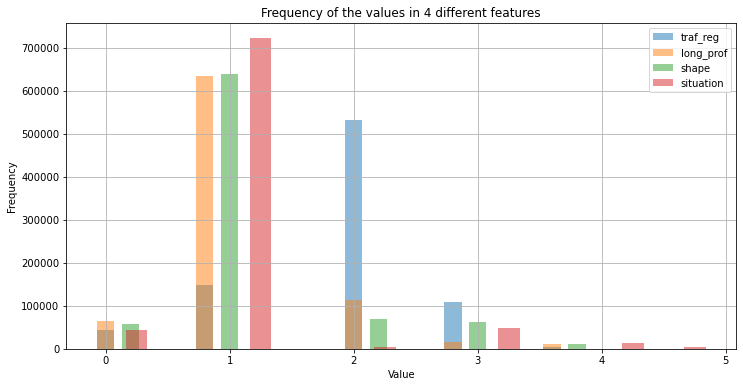

In [15]:
df['traf_reg'].hist(alpha=0.5, rwidth=0.35, align='left', figsize=(12,6), label='traf_reg')
df['long_prof'].hist(alpha=0.5,rwidth=0.35, align='left', label='long_prof')
df['shape'].hist(alpha=0.5,rwidth=0.35, align='mid', label='shape')
df['situation'].hist(alpha=0.5,rwidth=0.35, align='mid', label='situation')
plt.title('Frequency of the values in 4 different features', size=12)
plt.xticks(range(6))
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

- The frequency of traffic situation, shape and road profile is 1 while road regime is 2

In [16]:
df['traf_reg'].fillna(0, inplace=True)
df['traf_reg'] = df['traf_reg'].replace(0,2)

df['long_prof'].fillna(0, inplace=True)
df['long_prof'] = df['long_prof'].replace(0,1)

df['shape'].fillna(0, inplace=True)
df['shape'] = df['shape'].replace(0,1)

df['situation'].fillna(0, inplace=True)
df['situation'] = df['situation'].replace(0,1)

Text(0.5, 1.0, 'School feature values')

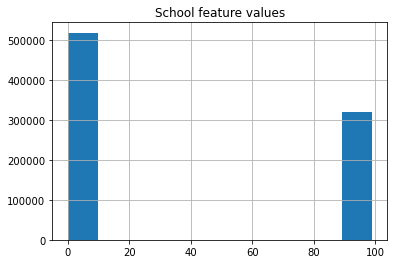

In [17]:
df.school.describe(), df.school.hist()
plt.title('School feature values')

In [18]:
df.school.fillna(0, inplace=True)
df['school'] = df.school.apply(lambda x:1 if x>0 else 0)

In [19]:
df["dep"] = df["dep"].div(10).apply(np.floor)
df["dep"] = df["dep"].astype(int)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 839985 entries, 0 to 839984
Data columns (total 24 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   ID         839985 non-null  int64  
 1   time       839985 non-null  float64
 2   lum        839985 non-null  int64  
 3   agg        839985 non-null  int64  
 4   int        839985 non-null  int64  
 5   atm        839985 non-null  float64
 6   col        839985 non-null  float64
 7   dep        839985 non-null  int32  
 8   road_cat   839985 non-null  float64
 9   traf_reg   839985 non-null  float64
 10  num_lanes  839985 non-null  float64
 11  long_prof  839985 non-null  float64
 12  shape      839985 non-null  float64
 13  surf       839985 non-null  float64
 14  situation  839985 non-null  float64
 15  school     839985 non-null  int64  
 16  crit_age   839985 non-null  int64  
 17  ped        839985 non-null  int64  
 18  dead_age   839985 non-null  int64  
 19  num_us     839985 non-n

### Exploratory Data Analysis

#### Considering only the severity values.

Accidents classified in each level of severity:
0    471695
1    368290
Name: sev, dtype: int64


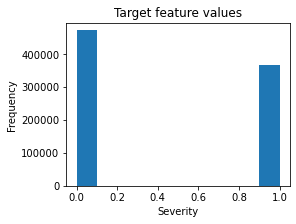

In [21]:
df.sev.plot.hist(figsize=(4,3))
plt.title('Target feature values')
plt.xlabel('Severity')
plt.ylabel('Frequency')
print('Accidents classified in each level of severity:')
print(df.sev.value_counts())

### seasonal variation of accident

In [22]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
date = df[['ID','sev', 'date']]
date.date

0        2016-02-01
1        2016-03-16
2        2016-07-13
3        2016-08-15
4        2016-12-23
            ...    
839980   2005-12-21
839981   2005-12-23
839982   2005-12-26
839983   2005-12-27
839984   2005-12-31
Name: date, Length: 839985, dtype: datetime64[ns]

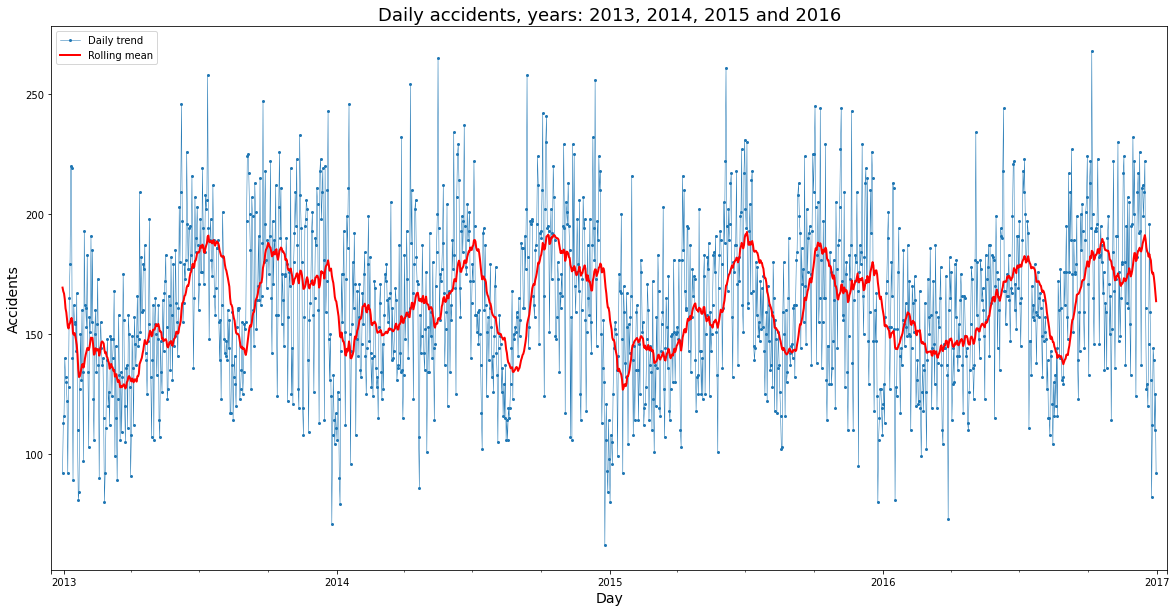

In [23]:
date['year'] = df.date.dt.year
date['month'] = df.date.dt.month
date['weekday'] = df.date.dt.weekday
high_sev = date[date['sev']==1]

season = date[['date', 'ID']].groupby('date').count()
season['rolling'] = season.ID.rolling(window=30).mean()
season['ID'][365*8:].plot(figsize=(20,10), marker='o', markersize=2, linewidth=0.5, label='Daily trend')
season['rolling'][365*8:].plot(color='r', linewidth=2, label='Rolling mean')
plt.title('Daily accidents, years: 2013, 2014, 2015 and 2016', size=18)
plt.xlabel('Day', size=14)
plt.ylabel('Accidents', size=14)

t0 = dt.datetime.strptime('2012-12-15', '%Y-%m-%d')
t1 = dt.datetime.strptime('2017-01-15', '%Y-%m-%d')

plt.xlim(t0,t1)
plt.legend()
plt.show()

### By year

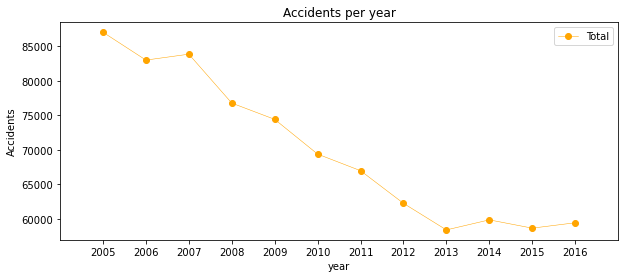

In [24]:
yearly = date[['year', 'ID']].groupby('year').count()
yearly['ID'].plot.line(figsize=(10,4), marker='o', linewidth=0.5, color='orange', label='Total')
plt.title('Accidents per year')
plt.xticks(range(2005,2017))
plt.xlim(2004,2017)
plt.ylabel('Accidents')
plt.legend()

### By months

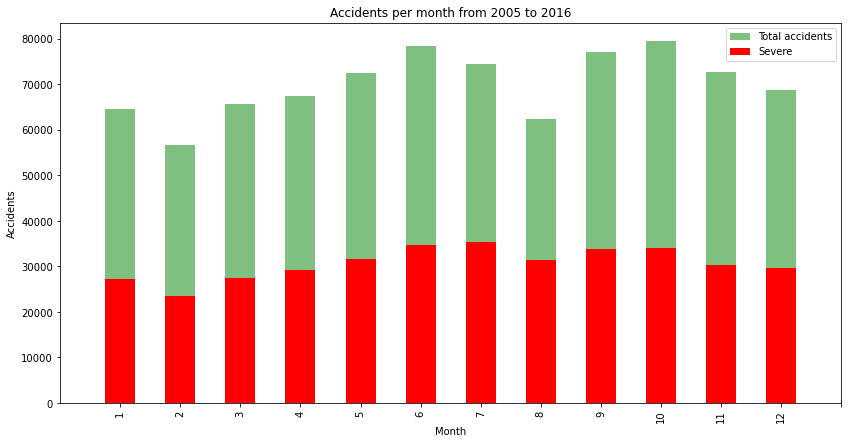

In [25]:
monthly = date[['month', 'ID']].groupby(['month']).count()
monthly['high_sev'] = high_sev[['month', 'ID']].groupby(['month']).count()


monthly['ID'].plot.bar(figsize=(14,7), alpha=0.5, color='g', label='Total accidents')
monthly['high_sev'].plot.bar(color='r', label='Severe')

plt.title('Accidents per month from 2005 to 2016')
plt.xticks(range(13))
plt.xlim(-1,12)
# plt.ylim(50000,85000)
plt.xlabel('Month')
plt.ylabel('Accidents')
plt.legend()

### By day of the week

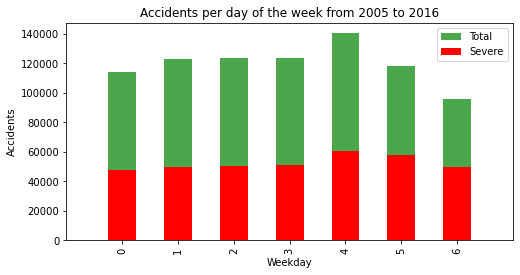

In [26]:
weekday = date[['weekday', 'ID']].groupby('weekday').count()
weekday['high_sev'] = high_sev[['weekday', 'ID']].groupby(['weekday']).count()
weekday['ID'].plot.bar(figsize=(8,4), alpha=0.7, color='g', label='Total')
weekday['high_sev'].plot.bar(color='r', label='Severe')

plt.title('Accidents per day of the week from 2005 to 2016')
plt.xticks(range(7))
plt.xlim(-1,7)
# plt.ylim(75000,150000)
plt.xlabel('Weekday')
plt.ylabel('Accidents')
plt.legend()

### By hour of the day

839985

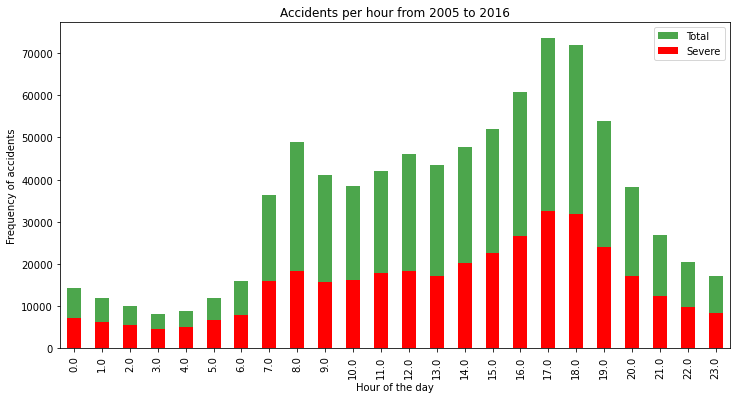

In [27]:
hourly = df[['ID', 'time']].groupby('time').count()
hourly['high_sev'] = df[df.sev==1][['ID', 'time']].groupby('time').count()
hourly['ID'].plot.bar(figsize=(12,6), alpha=0.7, color='g', label='Total')
hourly['high_sev'].plot.bar(color='r', label='Severe')
plt.xticks(range(24))
plt.title('Accidents per hour from 2005 to 2016')
plt.xlabel('Hour of the day')
plt.ylabel('Frequency of accidents')
plt.legend()
# df.time.value_counts()
# hourly.ID.value_counts()
hourly['ID'].sum()

The pattern shows the decrease of the accidents over years.However, the seasonal pattern shows different pattern which implies
higher rates on march and september.In addition to that, friday and sunday is the higher and least  accident rate, respectively
in compared to the other day of the week.Similarly, when analyzing on hourly basis, 8 am and 5-6 pm shows higher accident rate.

### fatal accidents by hour of the day

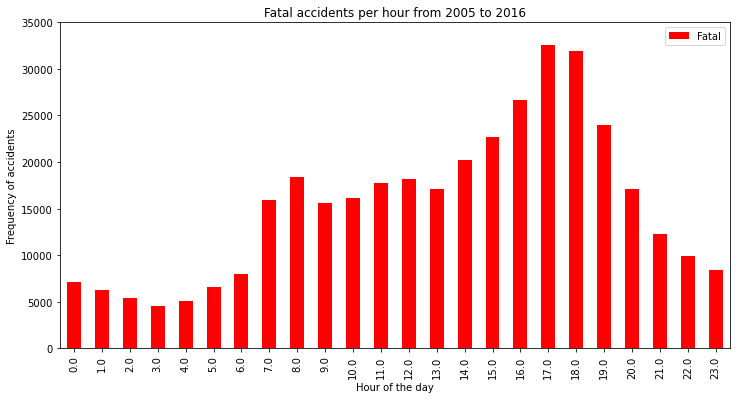

In [28]:
hourly['high_sev'].plot.bar(figsize=(12,6),color='r', label='Fatal')
plt.xticks(range(24))
plt.ylim((0,35000))
plt.title('Fatal accidents per hour from 2005 to 2016')
plt.xlabel('Hour of the day')
plt.ylabel('Frequency of accidents')
plt.legend()

In [29]:
noon_morn_severe = hourly.high_sev.loc[0:6].sum()+hourly.high_sev.loc[21:23].sum()
day_severe = hourly.high_sev.loc[7:20].sum()
noon_morn = hourly.ID.loc[0:6].sum()+hourly.ID.loc[21:23].sum()
day = hourly.ID.loc[7:20].sum()
noon_morn_prop = (noon_morn_severe/noon_morn)*100
day_prop = (day_severe/day)*100
print('The percentage of severe accidents from 9pm to 6am is {0:0.2f}% of the total amount of accidents ocurring between this hours,\
     while the percentage of deathly accidents from 7am to 8pm is {1:2.2f}%.'.format(noon_morn_prop.round(2), day_prop))

The percentage of severe accidents from 9pm to 6am is 50.67% of the total amount of accidents ocurring between this hours,     while the percentage of deathly accidents from 7am to 8pm is 42.41%.


In [30]:
df['month'] = df.date.dt.month
df['day'] = df.date.dt.day

In [31]:
df.day.value_counts

<bound method IndexOpsMixin.value_counts of 0          1
1         16
2         13
3         15
4         23
          ..
839980    21
839981    23
839982    26
839983    27
839984    31
Name: day, Length: 839985, dtype: int64>

### Correlation of severity among different characteristics

In [32]:
df[['sev','lum', 'agg', 'int', 'atm',
    'col', 'dep', 'road_cat', 'traf_reg',
    'num_lanes', 'long_prof', 'shape', 'surf', 
    'situation', 'school', 'crit_age','dead_age', 'ped',
    'num_us', 'weekend', 'holiday', 'month', 'day']].corr()['sev'].sort_values(ascending=False)

sev          1.000000
shape        0.144514
situation    0.128954
weekend      0.077594
traf_reg     0.076691
long_prof    0.069781
dead_age     0.048087
atm          0.048012
num_us       0.027533
col          0.026740
holiday      0.021744
month        0.008851
lum          0.002701
day          0.002161
surf         0.000874
ped         -0.005999
school      -0.025260
crit_age    -0.038168
int         -0.062982
road_cat    -0.100728
num_lanes   -0.101300
dep         -0.105883
agg         -0.277563
Name: sev, dtype: float64

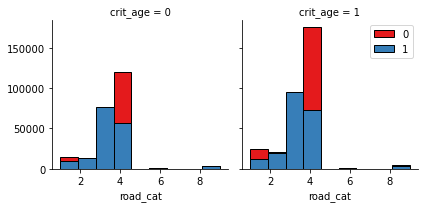

In [33]:
bins = np.linspace(df.atm.min(), df.atm.max(), 10)
g = sns.FacetGrid(df, col="crit_age", hue="sev", palette="Set1", col_wrap=2)
g.map(plt.hist,'road_cat', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

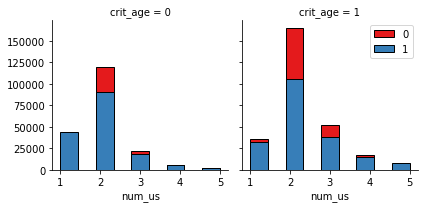

In [34]:
bins = np.linspace(df.lum.min(), df.lum.max(), 10)
g = sns.FacetGrid(df, col="crit_age", hue="sev", palette="Set1", col_wrap=2)
g.map(plt.hist, 'num_us', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

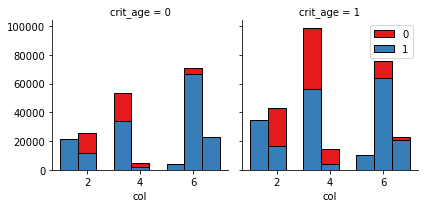

In [35]:
bins = np.linspace(df.col.min(), df.col.max(), 10)
g = sns.FacetGrid(df, col="crit_age", hue="sev", palette="Set1", col_wrap=2)
g.map(plt.hist, 'col', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

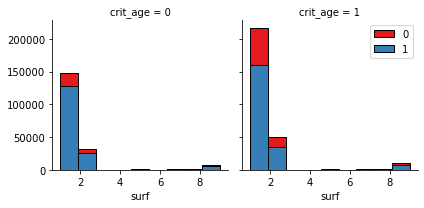

In [36]:
bins = np.linspace(df.surf.min(), df.surf.max(), 10)
g = sns.FacetGrid(df, col="crit_age", hue="sev", palette="Set1", col_wrap=2)
g.map(plt.hist, 'surf', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


Text(0.5, 0, 'Severity')

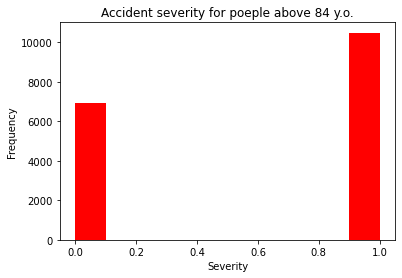

In [37]:
df['sev'][df['dead_age']==1].plot.hist(color='r')
# plt.xlabel('Hour of the day')
plt.title('Accident severity for poeple above 84 y.o.')
plt.xlabel('Severity')

Text(0.5, 0, 'Severity')

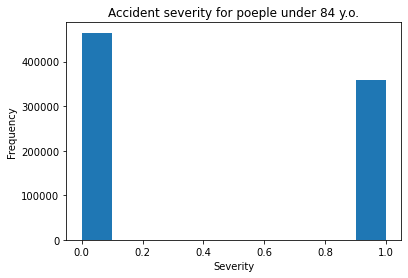

In [38]:
df['sev'][df['dead_age']==0].plot.hist()
plt.title('Accident severity for poeple under 84 y.o.')
plt.xlabel('Severity')

From the above result, we can see that there is no such a great correlation but this method is highlighted to find the correlation  if any exists.

## Data Preparation for the model development

In [39]:
df.drop(['ID', 'date'], axis=1, inplace=True)

In [40]:
#Some feature's values range from 1 to 9 while others just go either for 1 or 2, 
#Normalizing the data makes that any feature has more influence in the result than others.

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# X = df.drop('sev', axis=1)
# X = StandardScaler().fit(X).transform(X)

xtrain, xtest, ytrain, ytest = train_test_split(df.drop('sev', axis=1), df['sev'], test_size=0.2, random_state=8)
xtrain, xval, ytrain, yval = train_test_split(xtrain, ytrain, test_size=0.2) 


print('Size of training set:', xtrain.shape[0],'\n'
      'Size of test set:',xtest.shape[0],'\n'
      'Size of evaluation set:', xval.shape[0])

Size of training set: 537590 
Size of test set: 167997 
Size of evaluation set: 134398


## Importing required packages for the model development

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#Evaluation Metrics
import time
from sklearn.metrics import accuracy_score, log_loss, jaccard_score, classification_report
from sklearn.metrics import precision_score, recall_score, roc_curve

In [42]:
from sklearn.metrics import jaccard_score

## 1. Decision Tree

In [43]:
t0=time.time()
tree = DecisionTreeClassifier(criterion='entropy')
tree.fit(xtrain,ytrain)
print('Time taken :' , time.time()-t0)
yhat = tree.predict(xval)
score_tree = accuracy_score(yval,yhat)
print('Accuracy :',score_tree)

Time taken : 5.228066682815552
Accuracy : 0.6367877498177056


### 1.1. Random Forest

In [44]:
#number of decision trees reduced from 100 to 50
#Limiting the number of features to look at when creating the next split to 5
#Limiting the max depth of the tree to 10

t0=time.time()
model_rf = RandomForestClassifier(n_estimators=50, max_features=5, max_depth =10 ,criterion='entropy',random_state=0, n_jobs=-1)
model_rf.fit(xtrain,ytrain)
print('Time taken :' , time.time()-t0)
yhat = model_rf.predict(xval)
score_rf = accuracy_score(yval,yhat)
print('Accuracy :',score_rf)

Time taken : 13.651991844177246
Accuracy : 0.714646051280525


In [45]:
#number of decision trees reduced from 50 to 10
#Limiting the number of features to look at when creating the next split to 8
#Limiting the max depth of the tree to 12


t0=time.time()
model_rf = RandomForestClassifier(n_estimators=10, max_features=8, max_depth =12,criterion='entropy',random_state=0, n_jobs=-1)
model_rf.fit(xtrain,ytrain)
print('Time taken :' , time.time()-t0)
yhat = model_rf.predict(xval)
score_rf = accuracy_score(yval,yhat)
print('Accuracy :',score_rf)

Time taken : 4.746032238006592
Accuracy : 0.7189467105165256


In [46]:
#Evaluation
t0=time.time()
model_rf = RandomForestClassifier(n_estimators=10, max_features=8, max_depth =12,criterion='entropy',random_state=0, n_jobs=-1)
model_rf.fit(xtrain,ytrain)
t_rf = time.time()-t0
print('Time taken :' , t_rf)
yhat_rf = model_rf.predict(xtest)
jaccard_rf = jaccard_score(ytest,yhat_rf)
c_rf = classification_report(ytest,yhat_rf)
prec_rf = precision_score(ytest, yhat_rf)
rec_rf = recall_score(ytest, yhat_rf)
print('Jaccard :',jaccard_rf,'\n',
     c_rf)

Time taken : 4.736230850219727
Jaccard : 0.46987476913374476 
               precision    recall  f1-score   support

           0       0.71      0.84      0.77     94297
           1       0.73      0.57      0.64     73700

    accuracy                           0.72    167997
   macro avg       0.72      0.70      0.71    167997
weighted avg       0.72      0.72      0.71    167997



### 2. Logistic Regression

In [47]:
acc=np.zeros(6)
i=0
for c in [0.5, 0.1, 0.01, 0.001, 10, 100]:
    lr = LogisticRegression(C=c, solver='liblinear').fit(xtrain, ytrain)
    yhat = lr.predict(xval)
    acc[i] = accuracy_score(yval,yhat)
    i+=1
acc

array([0.67179571, 0.67181803, 0.67204869, 0.67208589, 0.67180315,
       0.67185524])

In [48]:
#Evaluation

t0=time.time()
lr = LogisticRegression(C=0.001, solver='liblinear').fit(xtrain, ytrain)
t_lr = time.time()-t0
print('Time taken :' , t_lr)
yhat = lr.predict(xtest)
jaccard_lr = jaccard_score(ytest,yhat)
c_lr = classification_report(ytest,yhat)
prec_lr = precision_score(ytest, yhat)
rec_lr = recall_score(ytest, yhat)
print('Jaccard :',jaccard_lr,'\n',
     c_lr)

Time taken : 5.833541631698608
Jaccard : 0.4005832420888306 
               precision    recall  f1-score   support

           0       0.67      0.80      0.73     94297
           1       0.67      0.50      0.57     73700

    accuracy                           0.67    167997
   macro avg       0.67      0.65      0.65    167997
weighted avg       0.67      0.67      0.66    167997



## 3. KNN

In [49]:
tt = xtrain.shape[0]
tv = xval.shape[0]
xtrain[int(tt*0.5):].shape[0], xval[int(tv*0.5):].shape[0]

(268795, 67199)

In [50]:
ks = 17
mean_acc = np.zeros(ks-1)
std_acc = np.zeros(ks-1)

for n in range(1,ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(xtrain[int(tt*0.5):],ytrain[int(tt*0.5):])
    yhat = neigh.predict(xval[int(tv*0.5):])
    mean_acc[n-1] = accuracy_score(yval[int(tv*0.5):],yhat)
    std_acc[n-1] = np.std(yhat==yval[int(tv*0.5):])/np.sqrt(yhat.shape[0])
print('Best performing K is '+ str(mean_acc.argmax()+1) + ' with an accuracy of ' +str(mean_acc.max()))

Best performing K is 15 with an accuracy of 0.6512894537121088


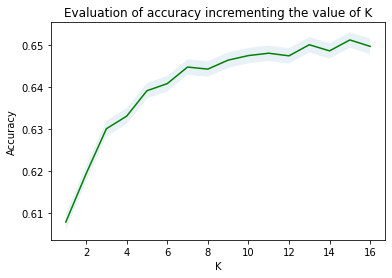

In [51]:
plt.plot(range(1,ks),mean_acc,'g')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Evaluation of accuracy incrementing the value of K')
plt.fill_between(range(1,ks),mean_acc-1*std_acc,mean_acc+1*std_acc, alpha=0.1)

In [52]:
#Evaluation
t0=time.time()
model_knn = KNeighborsClassifier(n_neighbors = 16, n_jobs=-1)
model_knn.fit(xtrain,ytrain)
t_knn = time.time()-t0
print('Time taken :' , t_knn)
yhat = model_knn.predict(xtest)
jaccard_knn = jaccard_score(ytest,yhat)
c_knn = classification_report(ytest,yhat)
prec_knn = precision_score(ytest, yhat)
rec_knn = recall_score(ytest, yhat)
print('Jaccard :',jaccard_knn,'\n',
     c_knn)

Time taken : 181.5490438938141
Jaccard : 0.37563138955222236 
               precision    recall  f1-score   support

           0       0.66      0.82      0.73     94297
           1       0.67      0.46      0.55     73700

    accuracy                           0.66    167997
   macro avg       0.66      0.64      0.64    167997
weighted avg       0.66      0.66      0.65    167997



## 4. SVM

In [53]:
size = [1000,5000,10000,12000,15000,20000,30000,40000,50000,75000,100000]
acc = []
t = []
for s in size:
    t0=time.time()
    sv = SVC().fit(xtrain[:s],ytrain[:s])
    t.append(time.time()-t0)
    yhat = sv.predict(xval[:s])
    acc.append(jaccard_score(yval[:s],yhat))

In [54]:
performance = pd.DataFrame({'acc':acc, 'time':t}, index=size)
performance

,acc,time
1000,0.330632,0.043931
5000,0.279035,0.886747
10000,0.232792,3.539839
12000,0.262177,5.240615
15000,0.272116,7.967509
20000,0.301515,13.820780
30000,0.327030,32.664265
40000,0.341391,63.577663
50000,0.349084,106.951173
75000,0.356655,266.643904


Text(0.5, 1.0, 'Time(s)')

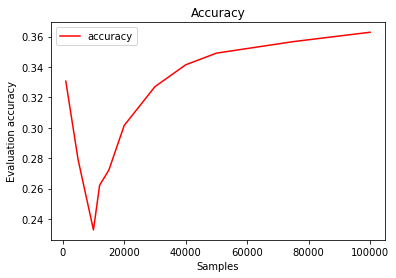

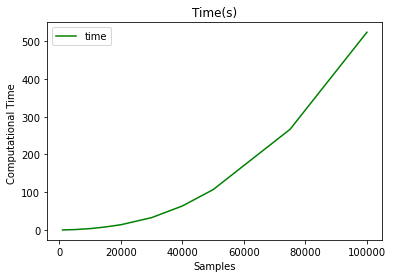

In [55]:
performance.plot(y='acc', color='r', label='accuracy')
plt.xlabel('Samples')
plt.ylabel('Evaluation accuracy')
plt.title('Accuracy')
performance.plot(y='time', color='green', label='time')
plt.xlabel('Samples')
plt.ylabel('Computational Time ')
plt.title('Time(s)')

In [57]:
#Evaluation

s=75000
t0=time.time()
sv = SVC().fit(xtrain[:s],ytrain[:s])
t_svm = time.time()-t0
print('Time taken :' , t_svm)
yhat = sv.predict(xtest[:s])
jaccard_svm = jaccard_score(ytest[:s],yhat)
c_svm = classification_report(ytest[:s],yhat)
prec_svm = precision_score(ytest[:s], yhat)
rec_svm = recall_score(ytest[:s], yhat)
print('Jaccard :',jaccard_lr,'\n',
     c_lr)

Time taken : 295.69887614250183
Jaccard : 0.4005832420888306 
               precision    recall  f1-score   support

           0       0.67      0.80      0.73     94297
           1       0.67      0.50      0.57     73700

    accuracy                           0.67    167997
   macro avg       0.67      0.65      0.65    167997
weighted avg       0.67      0.67      0.66    167997



## Results

In [58]:
list_jc = [jaccard_rf, jaccard_lr, jaccard_knn, jaccard_svm]
list_fs = [(2* prec_rf * rec_rf/ (prec_rf + rec_rf)), (2* prec_lr * rec_lr/ (prec_lr + rec_lr)), (2* prec_knn * rec_knn/ (prec_knn + rec_knn)), (2* prec_svm * rec_svm/ (prec_svm + rec_svm))]
list_prec = [prec_rf, prec_lr, prec_knn, prec_svm]
list_rec = [rec_rf, rec_lr, rec_knn, rec_svm]
list_time = [t_rf, t_lr, t_knn, t_svm]


In [59]:
# fomulate the report format
df = pd.DataFrame(list_jc, index=['Random Forest','Logistic Regression','KNN','SVM'])
df.columns = ['Jaccard']
df.insert(loc=1, column='F1-score', value=list_fs)
df.insert(loc=2, column='Precision', value=list_prec)
df.insert(loc=3, column='Recall', value=list_rec)
df.insert(loc=4, column='Time(S)', value=list_time)
df.columns.name = 'Algorithm'
df

Algorithm,Jaccard,F1-score,Precision,Recall,Time(S)
Random Forest,0.469875,0.639340,0.734314,0.566119,4.736231
Logistic Regression,0.400583,0.572023,0.665856,0.501370,5.833542
KNN,0.375631,0.546122,0.665315,0.463148,181.549044
SVM,0.356917,0.526070,0.691429,0.424539,295.698876


### ROC Curve

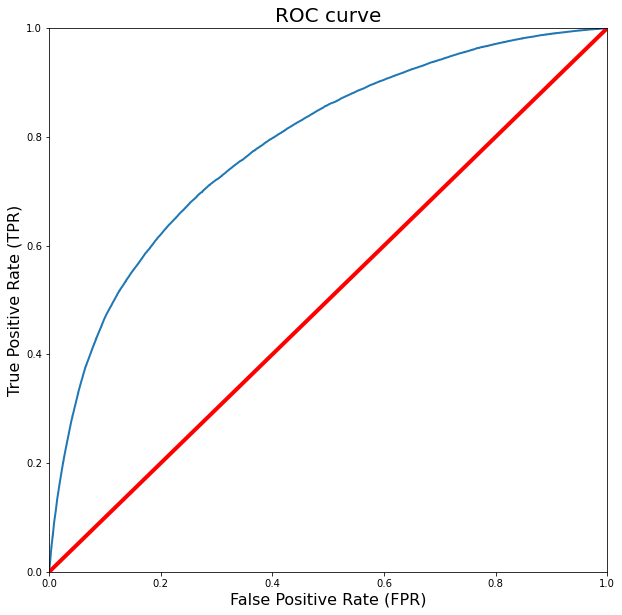

In [80]:
yscores = model_rf.predict_proba(xtest)

false_positive_rate, true_positive_rate, thresholds = roc_curve(ytest.values, yscores[:,1])

def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label='a')
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(10, 10))
plt.title('ROC curve', fontsize=20)
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()